## IMPORTING REQUIRED DEPENDENCIES

In [ ]:
import numpy as np
import pandas as pd

# Import visualization libraries
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## DATA PREPERATION AND CLEANING

In [ ]:
# Reading the CSV file.
df_jobs = pd.read_csv('/content/ds_salaries.csv')

In [ ]:
# Looking ath the colums
df_jobs.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [ ]:
# Dropping the un-named column
df_jobs.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
# Checking the dtypes of all colums
df_jobs.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
# Converting 'employee_residence','company_location','company_size','experience_level','employment_type' to categorical

df_jobs['experience_level'] = df_jobs['experience_level'].astype('category')
df_jobs['employment_type'] = df_jobs['employment_type'].astype('category')
df_jobs['employee_residence'] = df_jobs['employee_residence'].astype('category')
df_jobs['company_location'] = df_jobs['company_location'].astype('category')
df_jobs['company_size'] = df_jobs['company_size'].astype('category')

In [ ]:
df_jobs.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Statistical Analyisis

In [ ]:
df_jobs.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [ ]:
df_jobs['experience_level'].unique()

['MI', 'SE', 'EN', 'EX']
Categories (4, object): ['EN', 'EX', 'MI', 'SE']

Here the dataset is divided based on Experience level as follows:

1.   EN: Entry Level
2.   MI: Mid Level
3.   SE: Senior Level
4.   EX: Executive Level





In [ ]:
df_jobs['employment_type'].unique()

['FT', 'CT', 'PT', 'FL']
Categories (4, object): ['CT', 'FL', 'FT', 'PT']

In [ ]:
# Checking for missing values
df_jobs.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Exploratory Analysis and Visualization





## Distribution Of Experience Level

In [ ]:
df = df_jobs['experience_level'].value_counts().reset_index()
df.head()

,index,experience_level
0,SE,280
1,MI,213
2,EN,88
3,EX,26


In [ ]:
fig = px.pie(df, values='experience_level' , names='index',title= 'Distribution of Experience level',
             color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()


## Distribution of work

In [ ]:
df = df_jobs['remote_ratio'].value_counts().reset_index()

In [ ]:
df

,index,remote_ratio
0,100,381
1,0,127
2,50,99


In [ ]:
fig = px.pie(df,values='remote_ratio' , names=['Work From Home' , 'Hybrid','From Ofice'])
fig.show()

Observation: Due to Covid-19 majority of corporate jobs where work from home.

## Plotting Corelation Matrix

In [ ]:
fig = px.imshow(df_jobs.corr(), title='Heatmap of Correlation matrix of the dataset')
fig.update_traces(texttemplate="%{z}")
fig.show()

<ipython-input-17-e54f1debd037>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Comparing salaries of Data scientist jobs based on Experience level.

In [ ]:
df_jobs.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L


In [ ]:
fig = px.box(df_jobs , x='experience_level' , y='salary_in_usd' , color='experience_level',
             title='Experience Level VS Salary',color_discrete_sequence=px.colors.qualitative.Vivid )
fig.update_layout(xaxis_title="Experience Level", yaxis_title="Salary in USD")
fig.show()

Observation: Executive level staring salary is high itself and Senior data scientists earns great with average of 135.5k USD.

## Comparing salaries of Data scientist jobs based on Employment type.
  **PT Part-time**
  **FT Full-time**
  **CT Contract**
  **FL Freelance**

In [ ]:
fig = px.box(df_jobs, x='employment_type', y='salary_in_usd', title = 'Employment type VS Salary',
             color='employment_type',color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_layout(xaxis_title ='Type of employment' , yaxis_title='Salary in usd')
fig.show()

Observation: Contract Based Employers earn Better as compared to others.

## Comparing salaries based on experience level and Size of company

In [ ]:
fig = px.box(df_jobs, x="experience_level", y="salary_in_usd", color="company_size",
            title = 'Salary vs Experience level based on Company Size',
            color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(xaxis_title="Experience Level", yaxis_title="Salary in USD")
fig.show()

## Average salary as a function of currency

In [ ]:
df_jobs.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L


In [ ]:
df_jobs['salary_currency'].value_counts()

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64

In [ ]:
df_jobs.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L


In [ ]:
df = df_jobs[['salary_currency','salary_in_usd']].groupby(['salary_currency']).mean().reset_index().sort_values('salary_in_usd',ascending = False)
df = df.iloc[:15]
fig = px.bar(df, x='salary_currency', y='salary_in_usd', color = 'salary_currency',
            color_discrete_sequence=px.colors.qualitative.Safe,
            title = 'Average salary as a function of currency')
fig.update_layout(xaxis_title="Currency", yaxis_title="Mean Salary")
fig.show()

## Average Salary as a function of Company location

In [ ]:
df_jobs.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L


In [ ]:
!pip install country_converter
import country_converter as coco
df_jobs["company_country"] = coco.convert(names = df_jobs["company_location"], to = 'name_short')
df_jobs["company_country"]

df = df_jobs[['company_country','salary_in_usd']].groupby(['company_country']).mean().reset_index().sort_values('salary_in_usd',ascending = False)
df = df.iloc[:15]
fig = px.bar(df, x='company_country', y='salary_in_usd', color = 'company_country',
            color_discrete_sequence=px.colors.qualitative.Dark2,
            title = 'Average salary as a function of company location')
fig.update_layout(xaxis_title="Company location", yaxis_title="Mean Salary")
fig.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.4 MB/s eta 0:00:00


## Country-wise comparison of salaries

In [ ]:
# df = df_jobs[['company_country', 'salary_in_usd' ]].groupby(['company_country']).sum().reset_index()
from plotly.graph_objects import Figure

df_jobs['salary_scale'] = np.log10(df_jobs['salary_in_usd'])

fig = px.choropleth(df_jobs,locationmode = "country names" ,locations = "company_country" ,
                    color="salary_scale",hover_name="company_country" ,
                    hover_data = df[['salary_in_usd']],
                    title = 'Salaries across the World')
fig.show()

<ipython-input-50-465ccc8787c5>:1: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



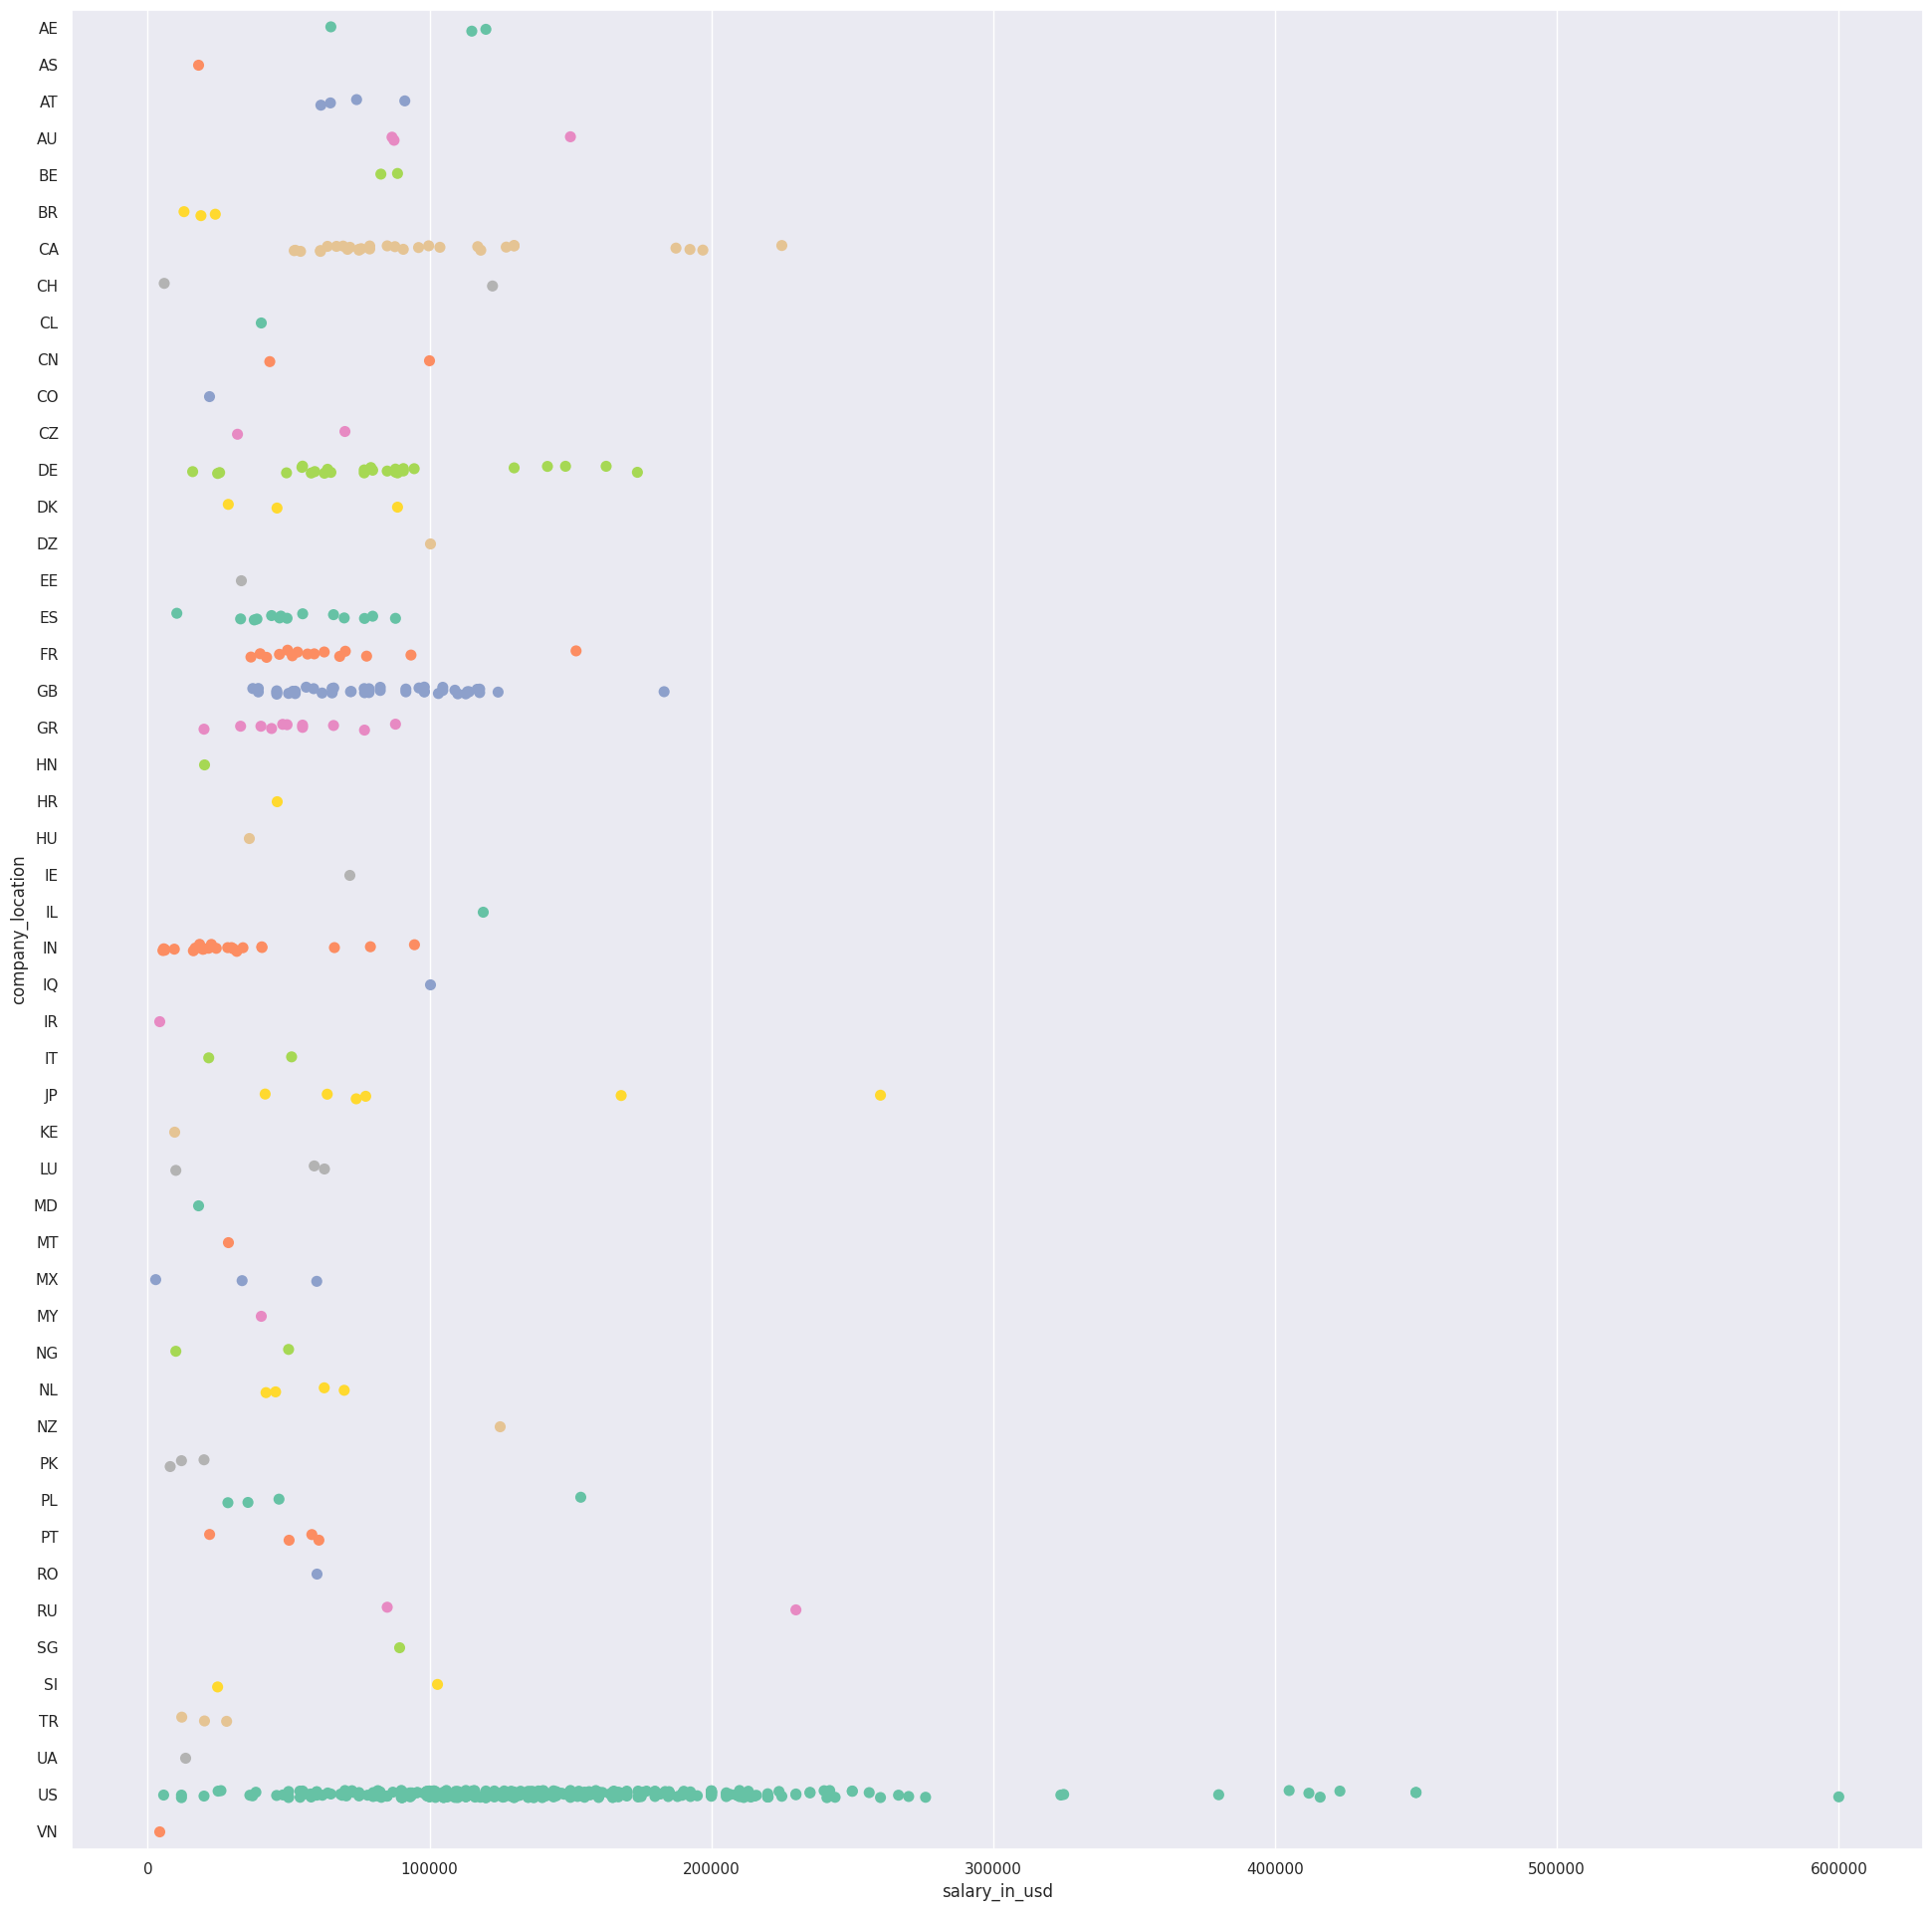

In [ ]:
sns.stripplot(y = 'company_location', x = 'salary_in_usd', data = df_jobs, palette="Set2", s = 8)
sns.set(rc = {'figure.figsize':(24,24)})

## Top 10 Data Science job positions

In [ ]:
df_jobs["job_title"].value_counts().reset_index()

,index,job_title
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16
5,Data Science Manager,12
6,Data Architect,11
7,Big Data Engineer,8
8,Machine Learning Scientist,8
9,Principal Data Scientist,7


In [ ]:
df = df_jobs["job_title"].value_counts().reset_index()
df = df.iloc[:10]
df

,index,job_title
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16
5,Data Science Manager,12
6,Data Architect,11
7,Big Data Engineer,8
8,Machine Learning Scientist,8
9,Principal Data Scientist,7


In [ ]:
fig = px.pie(df, values='job_title', names='index', title= 'Distribution of job positions',
            color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()

## Word Cloud

In [ ]:
from wordcloud import WordCloud
text = " ".join(job_titles for job_titles in df_jobs["job_title"])
word_cloud = WordCloud(background_color = 'white', colormap = 'Spectral', min_font_size = 2).generate(text)
word_cloud.to_file('wordcloud.png')
# plt.figure(figsize = (10, 10))
# plt.imshow(word_cloud)
# plt.axis("off")
# plt.show()